In [1]:
import pandas as pd
import numpy as np
import metapack as mp
from pathlib import Path
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from sdipylib.plot import  source_attribution

# /Users/eric/opt/anaconda3/envs/data/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
# The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
#   layout[ax.rowNum, ax.colNum] = ax.get_visible()
import warnings
warnings.simplefilter("ignore")

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

%run weights.py
%run lib.py 

source = "Survey of Consumer Finances, 2016 and 2019 pooled"


In [2]:
import pickle
with open('series.pickle', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    series = pickle.load(f)
    
s = pd.DataFrame([ (N, ncw, v.mean(), v.std(), v.std()/np.sqrt(len(v))) for  N, ncw, v in series ], columns = 'N ncw m sd se'.split())
s

,N,ncw,m,sd,se
0,100000,100,116920.625506,3415.772612,341.577261
1,120000,100,117527.988415,3111.236562,311.123656
2,144000,100,117027.459024,3501.271561,350.127156
3,172800,100,116982.996785,2708.334458,270.833446
4,207360,100,116911.940507,3228.838009,322.883801
...,...,...,...,...,...
164,429981,891,117060.721991,3024.506787,101.324790
165,515978,891,116905.051137,2880.276166,96.492882
166,619173,891,117072.332383,2946.108815,98.698359
167,743008,891,117211.913970,2995.697018,100.359626


In [3]:
s.describe()

,N,ncw,m,sd,se
count,169.000000,169.000000,169.000000,169.000000,169.000000
mean,373050.615385,372.615385,117051.712885,3012.457628,185.439590
std,244068.041430,244.009636,195.210571,147.488367,65.876975
min,100000.000000,100.000000,116463.232831,2471.269953,96.492882
25%,172800.000000,172.000000,116935.804908,2926.456521,129.375074
50%,298598.000000,298.000000,117055.912263,3008.456475,175.528615
75%,515978.000000,515.000000,117180.739729,3101.375610,238.147255
max,891610.000000,891.000000,117586.350591,3503.222728,350.127156


In [4]:
s.groupby('ncw').mean()[['m','se']].describe()

,m,se
count,13.000000,13.000000
mean,117051.712885,185.439590
std,39.954242,67.451645
min,116994.720819,100.333202
25%,117031.125826,132.214117
50%,117039.740683,174.900881
75%,117074.996193,233.228238
max,117129.636141,311.607428


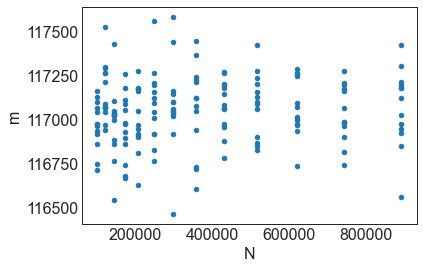

In [5]:
s.sort_values('N').plot.scatter('N','m')

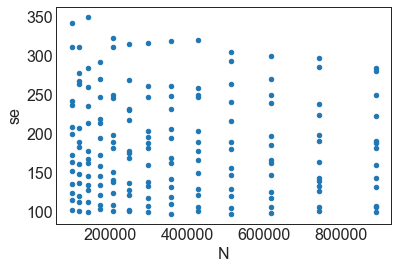

In [6]:
s.sort_values('N').plot.scatter('N','se')

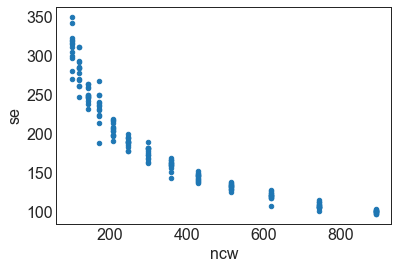

In [11]:
s.sort_values('ncw').plot.scatter('ncw','se')

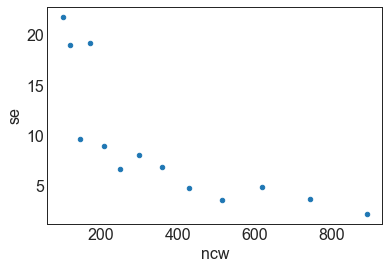

In [10]:
s.groupby('ncw').std().reset_index().plot.scatter('ncw','se')

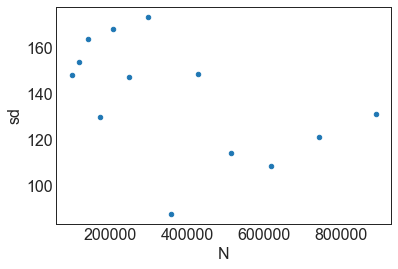

In [9]:
s.groupby('N').std().reset_index().plot.scatter('N','sd')